In [19]:
#Absolute Relative Frequency
#上节课用的都是绝对评率,也就是纵坐标轴数据点的数量

#相对频率, 各类别数据的占比

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [20]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(10)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [38]:
pkmn_types = pokemon.melt(id_vars= ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:812]

# s.reindex

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [41]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

print(type_counts)
print()
print(type_order)

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')


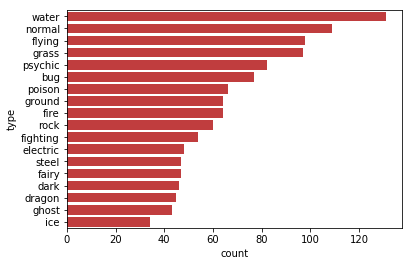

In [42]:
base_color = sb.color_palette()[3]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

In [46]:
#各属性的精灵占比
n_pokemon = pokemon.shape[0]
print(n_pokemon)

max_type_count = type_counts[0]
print(max_type_count)
max_prop = max_type_count/ n_pokemon
print(max_prop)

807
131
0.1623296158612144


In [47]:
#生成等差比值集合
np.arange(0, max_prop,0.02)


array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [64]:
tick_props = np.arange(0, max_prop, 0.02)


In [65]:
#用列表推导式:
#刻度标尺:


tick_name = {'{:0.2f}'.format(v) for v in tick_props}
print(tick_name)

{'0.00', '0.04', '0.02', '0.08', '0.16', '0.10', '0.06', '0.14', '0.12'}


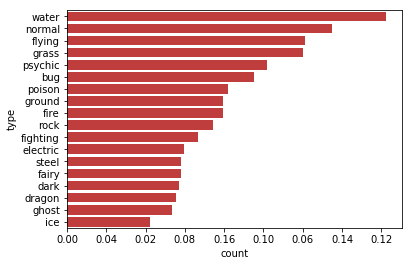

In [54]:
base_color = sb.color_palette()[3]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props*n_pokemon, tick_name);

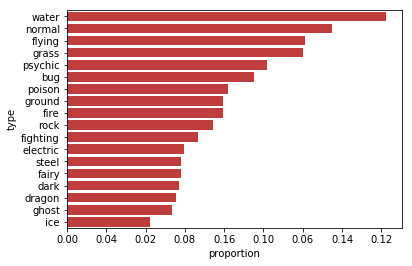

In [57]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props*n_pokemon, tick_name);
plt.xlabel('proportion');

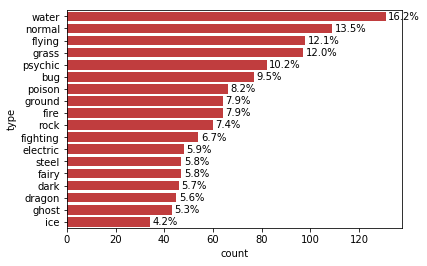

In [63]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center');